Regression model for predicting housing prices using California Housing Prices dataset from Kaggle.

In [183]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

%matplotlib inline

In [184]:
df = pd.read_csv('https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv')

In [185]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [186]:
print(df.info())
print(df.describe())
print(df.dtypes)
print(df.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
None
          longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952

Look at the median_house_value variable. Does it have a long tail?
Yes

<AxesSubplot:>

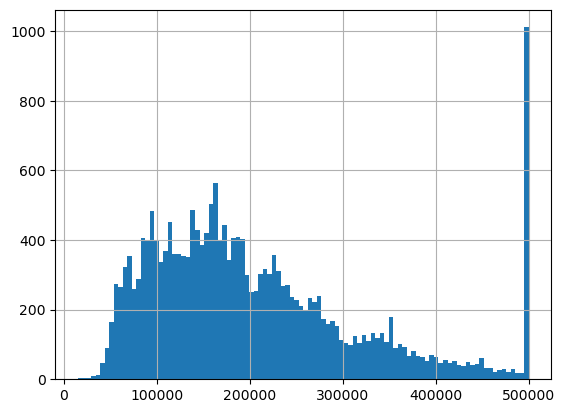

In [187]:
df.median_house_value.hist(bins=100)

<AxesSubplot:>

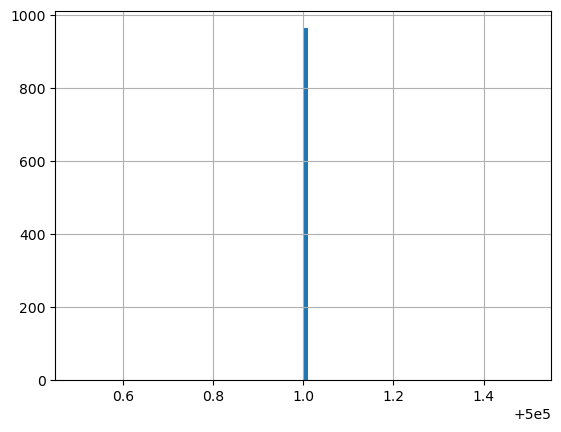

In [188]:
df.median_house_value[df.median_house_value > 500000].hist(bins=100)

Data preparetion

In [189]:
#keep only the records where ocean_proximity is either '<1H OCEAN' or 'INLAND'
df_h = df[(df.ocean_proximity == '<1H OCEAN') | (df.ocean_proximity == 'INLAND')]

print(df.ocean_proximity.nunique())
print(df_h.ocean_proximity.nunique())

5
2


In [190]:
#use only the following columns: 'latitude', 'longitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value'

df_h = df_h[['latitude', 'longitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']]
df_h.head()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
701,37.64,-121.97,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0
830,37.61,-121.99,9.0,3666.0,711.0,2341.0,703.0,4.6458,217000.0
859,37.57,-121.97,21.0,4342.0,783.0,2172.0,789.0,4.6146,247600.0
860,37.58,-121.96,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0
861,37.58,-121.98,20.0,4126.0,1031.0,2079.0,975.0,3.6832,216900.0


Question 1
There's one feature with missing values. What is it?

In [191]:
df_h.isnull().sum()

latitude                0
longitude               0
housing_median_age      0
total_rooms             0
total_bedrooms        157
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

Answer: total_bedrooms

Question 2
What's the median (50% percentile) for variable 'population'?

In [192]:
print(df_h.population.describe(), '\n')
print(df_h.population.median())

count    15687.000000
mean      1466.317205
std       1180.389908
min          3.000000
25%        802.000000
50%       1195.000000
75%       1777.000000
max      35682.000000
Name: population, dtype: float64 

1195.0


Answer: 1195

Prepare and split the dataset
- Shuffle the dataset (the filtered one you created above), use seed 42.
- Split your data in train/val/test sets, with 60%/20%/20% distribution.
- Apply the log transformation to the median_house_value variable using the np.log1p() function.

<AxesSubplot:>

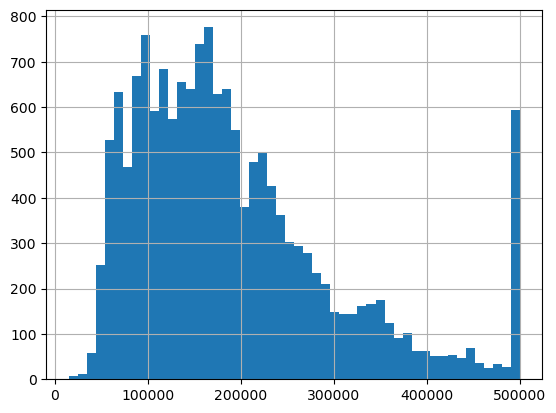

In [193]:
df_h.median_house_value.hist(bins=50)

<AxesSubplot:>

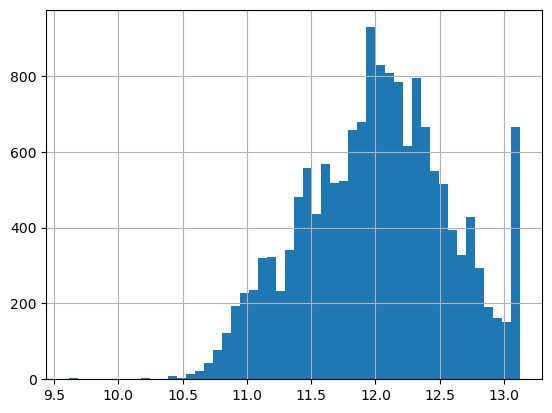

In [194]:
df_h.median_house_value = np.log1p(df_h.median_house_value)
df_h.median_house_value.hist(bins=50)

In [195]:
df_h.head()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
701,37.64,-121.97,32.0,1283.0,194.0,485.0,171.0,6.0574,12.973866
830,37.61,-121.99,9.0,3666.0,711.0,2341.0,703.0,4.6458,12.287657
859,37.57,-121.97,21.0,4342.0,783.0,2172.0,789.0,4.6146,12.419574
860,37.58,-121.96,15.0,3575.0,597.0,1777.0,559.0,5.7192,12.554971
861,37.58,-121.98,20.0,4126.0,1031.0,2079.0,975.0,3.6832,12.287196


In [196]:
n = len(df_h)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

n, n_val, n_test, n_train, n_val + n_test + n_train

(15687, 3137, 3137, 9413, 15687)

In [197]:
idx = np.arange(n)
np.random.seed(42)
np.random.shuffle(idx)

In [198]:
df_train = df_h.iloc[idx[ : n_train]]
df_val = df_h.iloc[idx[n_train : n_train + n_val]]
df_test = df_h.iloc[idx[n_train + n_val : ]]

In [199]:
len(df_h), len(df_train), len(df_val), len(df_test), len(df_train) + len(df_val) + len(df_test)

(15687, 9413, 3137, 3137, 15687)

In [200]:
df_train.head()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
19963,36.23,-119.14,22.0,2935.0,523.0,1927.0,530.0,2.5875,11.161963
5929,34.12,-117.79,16.0,2426.0,426.0,1319.0,446.0,4.8125,12.321635
11377,33.68,-117.97,26.0,3653.0,568.0,1930.0,585.0,5.7301,12.471896
6443,34.10,-118.03,32.0,2668.0,609.0,1512.0,541.0,2.9422,12.359227
17546,37.34,-121.87,39.0,2479.0,541.0,1990.0,506.0,2.4306,12.574531


In [201]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
df_train.head()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,36.23,-119.14,22.0,2935.0,523.0,1927.0,530.0,2.5875,11.161963
1,34.12,-117.79,16.0,2426.0,426.0,1319.0,446.0,4.8125,12.321635
2,33.68,-117.97,26.0,3653.0,568.0,1930.0,585.0,5.7301,12.471896
3,34.10,-118.03,32.0,2668.0,609.0,1512.0,541.0,2.9422,12.359227
4,37.34,-121.87,39.0,2479.0,541.0,1990.0,506.0,2.4306,12.574531


In [202]:
y_train = df_train.median_house_value
y_val = df_val.median_house_value
y_test = df_test.median_house_value

y_train

0       11.161963
1       12.321635
2       12.471896
3       12.359227
4       12.574531
          ...    
9408    12.604516
9409    10.618910
9410    13.122367
9411    12.118885
9412    12.529246
Name: median_house_value, Length: 9413, dtype: float64

In [203]:
del df_train['median_house_value']
df_val.drop('median_house_value', axis='columns', inplace=True)
del df_test['median_house_value']

In [204]:
df_val.head()


,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,37.02,-120.09,9.0,1608.0,297.0,1057.0,295.0,3.7143
1,33.84,-117.88,34.0,1410.0,214.0,837.0,240.0,6.1168
2,33.95,-118.21,32.0,1116.0,328.0,1265.0,302.0,2.2950
3,36.32,-119.32,29.0,2409.0,436.0,1142.0,440.0,3.6895
4,33.14,-117.11,10.0,3208.0,636.0,1395.0,582.0,3.4455


Question 3
- We need to deal with missing values for the column from Q1.
- We have two options: fill it with 0 or with the mean of this variable.
- Try both options. For each, train a linear regression model without regularization using the code from the lessons.
- For computing the mean, use the training only!
- Use the validation dataset to evaluate the models and compare the RMSE of each option.
- Round the RMSE scores to 2 decimal digits using round(score, 2)
- Which option gives better RMSE?

In [205]:
df_train.isnull().sum()

latitude               0
longitude              0
housing_median_age     0
total_rooms            0
total_bedrooms        94
population             0
households             0
median_income          0
dtype: int64

In [206]:
#Fill with 0
X_train_z = df_train.fillna(0).values
X_train_z

array([[ 3.6230e+01, -1.1914e+02,  2.2000e+01, ...,  1.9270e+03,
         5.3000e+02,  2.5875e+00],
       [ 3.4120e+01, -1.1779e+02,  1.6000e+01, ...,  1.3190e+03,
         4.4600e+02,  4.8125e+00],
       [ 3.3680e+01, -1.1797e+02,  2.6000e+01, ...,  1.9300e+03,
         5.8500e+02,  5.7301e+00],
       ...,
       [ 3.4130e+01, -1.1808e+02,  4.6000e+01, ...,  3.7700e+02,
         1.4500e+02,  8.4546e+00],
       [ 3.4290e+01, -1.1846e+02,  2.4000e+01, ...,  3.1510e+03,
         8.1000e+02,  3.0526e+00],
       [ 3.4000e+01, -1.1841e+02,  1.8000e+01, ...,  8.8400e+02,
         4.5600e+02,  2.9338e+00]])

In [207]:
#Fill with mean
X_train_mean = df_train.fillna(df_train.mean()).values

In [208]:
#Train linear regression
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [209]:
#RMSE
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [210]:
w0, w = train_linear_regression(X_train_z, y_train)
y_pred = w0 + X_train_z.dot(w)
rmse(y_train, y_pred)

0.3402719715829542

In [212]:
#Zeros on validation
X_val = df_val.values
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

0.34002860084919434

In [213]:
#Mean on val
w0, w = train_linear_regression(X_train_mean, y_train)
y_pred = w0 + X_train_mean.dot(w)
round(rmse(y_train, y_pred), 2)

0.34

In [214]:
X_val = df_val.values
y_pred = w0 + X_val.dot(w)
round(rmse(y_val, y_pred), 2)

0.34

Answer: in case round - "Both are equally good"

Question 4
- Now let's train a regularized linear regression.
- For this question, fill the NAs with 0.
- Try different values of r from this list: [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10].
- Use RMSE to evaluate the model on the validation dataset.
- Round the RMSE scores to 2 decimal digits.
- Which r gives the best RMSE?

In [215]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [216]:
for r in [0.0, 0.00001, 0.0001, 0.001, 0.1, 1, 10]:
    w0, w = train_linear_regression_reg(X_train_z, y_train, r=r)

    y_pred = w0 + X_val.dot(w)
    score = round(rmse(y_val, y_pred), 2)
    
    print(r, w0, score)

0.0 -9.763249480961484 0.34
1e-05 -9.7630430174023 0.34
0.0001 -9.76118523895649 0.34
0.001 -9.742646252554156 0.34
0.1 -8.05888977211378 0.34
1 -3.133154279369632 0.34
10 -0.43811723165904154 0.35


If there are multiple options, select the smallest r.

Options:
- 0
- 0.000001
- 0.001
- 0.0001

Answer is 0

Question 5

We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].
For each seed, do the train/validation/test split with 60%/20%/20% distribution.
Fill the missing values with 0 and train a model without regularization.
For each seed, evaluate the model on the validation dataset and collect the RMSE scores.
What's the standard deviation of all the scores? To compute the standard deviation, use np.std.
Round the result to 3 decimal digits (round(std, 3))

What's the value of std?
- 0.5
- 0.05
- 0.005
- 0.0005

In [223]:
score_list = []

df = pd.read_csv('https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv')
df_row = df[(df.ocean_proximity == '<1H OCEAN') | (df.ocean_proximity == 'INLAND')]
df_prep = df_row[['latitude', 'longitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']]


for n in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    idx = np.arange(len(df_prep))
    np.random.seed(n)
    np.random.shuffle(idx)

    df_shuffled = df_prep.iloc[idx]

    df_train = df_shuffled.iloc[idx[ : n_train]].copy()
    df_val = df_shuffled.iloc[idx[n_train : n_train + n_val]].copy()
    df_test = df_shuffled.iloc[idx[n_train + n_val : ]].copy()

    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)

    y_train_orig = df_train.median_house_value.values
    y_val_orig = df_val.median_house_value.values
    y_test_orig = df_test.median_house_value.values

    y_train = np.log1p(y_train_orig)
    y_val = np.log1p(y_val_orig)
    y_test = np.log1p(y_test_orig)

    del df_train['median_house_value']
    del df_val['median_house_value']
    del df_test['median_house_value']

    X_train_null = df_train.fillna(0).values

    w0, w = train_linear_regression(X_train_null, y_train)

    X_val_null = df_val.fillna(0).values
    y_pred = w0 + X_val_null.dot(w)
    score = np.round(rmse(y_val, y_pred), 2)

    score_list.append(score)

    print(n, w0, score)

0 -10.156623820443635 0.34
1 -10.233035656551023 0.33
2 -10.080152481333846 0.33
3 -9.439191276676546 0.33
4 -10.148586539733966 0.34
5 -10.205032145488595 0.34
6 -9.805005724025474 0.34
7 -9.161758476192102 0.34
8 -10.164467285681086 0.34
9 -9.872965136548384 0.34


In [224]:
score_list

[0.34, 0.33, 0.33, 0.33, 0.34, 0.34, 0.34, 0.34, 0.34, 0.34]

In [225]:
std = round(np.std(score_list), 3)
std

0.005

Anawer 0.005

Question 6
- Split the dataset like previously, use seed 9.
- Combine train and validation datasets.
- Fill the missing values with 0 and train a model with r=0.001.
- What's the RMSE on the test dataset?

Options:
- 0.13
- 0.23
- 0.33
- 0.43

In [244]:
#Split the dataset like previously, use seed 9.
df = pd.read_csv('https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv')
df_row = df[(df.ocean_proximity == '<1H OCEAN') | (df.ocean_proximity == 'INLAND')]
df_prep = df_row[['latitude', 'longitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']]

idx = np.arange(len(df_prep))
np.random.seed(9)
np.random.shuffle(idx)

df_shuffled = df_prep.iloc[idx]

df_train = df_shuffled.iloc[idx[ : n_train]].copy()
df_val = df_shuffled.iloc[idx[n_train : n_train + n_val]].copy()
df_test = df_shuffled.iloc[idx[n_train + n_val : ]].copy()

In [245]:
#Combine train and validation datasets.

df_train_val = pd.concat([df_train, df_val])

df_train_val = df_train_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train_val_orig = df_train_val.median_house_value.values
y_test_orig = df_test.median_house_value.values

y_train_val = np.log1p(y_train_val_orig)
y_test = np.log1p(y_test_orig)

del df_train_val['median_house_value']
del df_test['median_house_value']

print (df_train.shape[0], df_val.shape[0], df_train_val.shape[0], df_train.shape[0] + df_val.shape[0])

9413 3137 12550 12550


In [248]:
#Fill the missing values with 0 and train a model with r=0.001.

X_train_val_null = df_train_val.fillna(0).values

w0_train_val, w_train_val = train_linear_regression_reg(X_train_val_null, y_train_val, r=0.001)

In [249]:
#What's the RMSE on the test dataset?

X_test_null = df_test.fillna(0).values
y_null_pred_test = w0_train_val + X_test_null.dot(w_train_val)

rmse(y_test, y_null_pred_test)

0.34232150040498227